In [1]:
!pip install qrcode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.5 MB/s eta 0:00:00


HTML(value="<h1 style='font-family: Arial Black; color: #856ff8;'>Miuzik4U</h1>")

Dropdown(description='Language:', options=('TAMIL', 'TELUGU', 'KANNADA', 'HINDI'), value='TAMIL')

Dropdown(description='Genre:', options=('MELODY', 'EMOTIONAL', 'ENERGETIC', 'CLASSICAL'), value='MELODY')

Button(description='Clear', style=ButtonStyle())

Button(description='Submit', style=ButtonStyle())

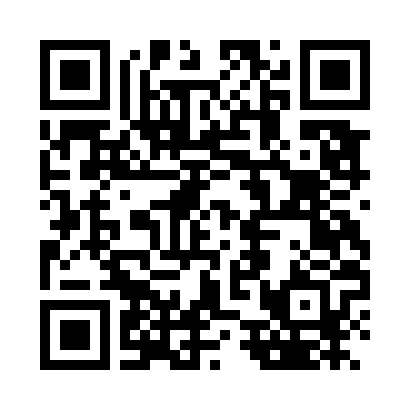

In [7]:
import ipywidgets as widgets
from IPython.display import display, Image
import qrcode
import random
from io import BytesIO

# Display the header
header = widgets.HTML(value="<h1 style='font-family: Arial Black; color: #856ff8;'>Miuzik4U</h1>")
display(header)

# Language and Genre options
languages = ["TAMIL", "TELUGU", "KANNADA", "HINDI"]
genres = ["MELODY", "EMOTIONAL", "ENERGETIC", "CLASSICAL"]

# Functions to handle lists and SongFile
def Tamil_list(lines):
    Tamil_list = [line.split()[0] for line in lines if line.split()[2] == "TAMIL"]
    return Tamil_list

def Hindi_list(lines):
    Hindi_list = [line.split()[0] for line in lines if line.split()[2] == "HINDI"]
    return Hindi_list

def Telugu_list(lines):
    Telugu_list = [line.split()[0] for line in lines if line.split()[2] == "TELUGU"]
    return Telugu_list

def Kannada_list(lines):
    Kannada_list = [line.split()[0] for line in lines if line.split()[2] == "KANNADA"]
    return Kannada_list

def SongFile(language, genre):
    if genre == "GENRE":
        return ''
    file_map = {
        "MELODY": "/content/MELODY.txt",
        "ENERGETIC": "/content/ENERGETIC.txt",
        "EMOTIONAL": "/content/EMOTIONAL.txt",
        "CLASSICAL": "/content/CLASSICAL.txt"
    }
    file = file_map.get(genre, '')

    with open(file, "r") as f:
        lines = f.readlines()

    if language == "TAMIL":
        langlist = Tamil_list(lines)
    elif language == "HINDI":
        langlist = Hindi_list(lines)
    elif language == "TELUGU":
        langlist = Telugu_list(lines)
    elif language == "KANNADA":
        langlist = Kannada_list(lines)

    a = random.randint(0, len(langlist) - 1)
    return langlist[a]

def QrCode(Url):
    # Create a QR code
    qr = qrcode.make(Url)
    # Convert the QR code to an in-memory image to display in the notebook
    img_byte_arr = BytesIO()
    qr.save(img_byte_arr)
    img_byte_arr.seek(0)
    return Image(data=img_byte_arr.read(), format='png')

# Function to handle song addition (stub for Colab environment)
def AddSongs(song):
    with open("ADDSONGS.txt", "a") as f:
        f.write(song + '\n')

# Function to clear selection
def clear_cb(b):
    language_selector.value = languages[0]
    genre_selector.value = genres[0]

# Function to handle submission
def submit_button_clicked(b):
    language = language_selector.value
    genre = genre_selector.value
    if genre != 'GENRE':
        url = SongFile(language, genre)
        if url:
            display(QrCode(url))  # Display the QR code in the notebook

# Language and Genre dropdowns
language_selector = widgets.Dropdown(
    options=languages,
    value=languages[0],  # Default to first language
    description='Language:',
    disabled=False
)

genre_selector = widgets.Dropdown(
    options=genres,
    value=genres[0],  # Default to first genre
    description='Genre:',
    disabled=False
)

# Clear button
clear_button = widgets.Button(description="Clear")
clear_button.on_click(clear_cb)

# Submit button
submit_button = widgets.Button(description="Submit")
submit_button.on_click(submit_button_clicked)

# Display widgets
display(language_selector)
display(genre_selector)
display(clear_button)
display(submit_button)
